Volumetric wavelet Data Processing
==================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores volumetric (3D) data processing.

In [1]:
using PyPlot
using NtToolBox
# using Autoreload
# arequire("NtToolBox")
# areload()

3D Volumetric Datasets
----------------------


We load a volumetric data.

In [2]:
M = NtToolBox.read_bin("NtToolBox/src/data/vessels.bin", 3);

In [3]:
M = NtToolBox.rescale(M);

Size of the image (here it is a cube).

In [4]:
n = size(M)[2];

We can display some horizontal slices.

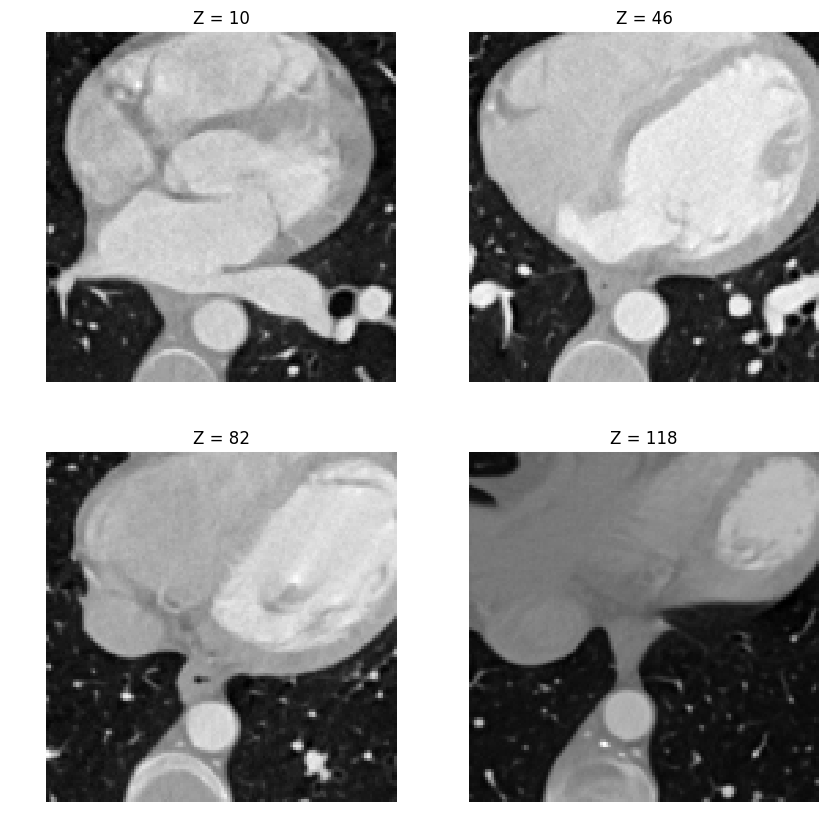

In [5]:
slices = Array{Int64,1}(round(linspace(10, n-10, 4)))
figure(figsize = (10,10))

for i in 1:length(slices)
    s = slices[i]
    NtToolBox.imageplot(M[:, :, s], @sprintf("Z = %i", s), [2, 2, i])
end

We can display an isosurface of the dataset (here we sub-sample to speed
up the computation).
You need to have PyCall package installed in Julia in order to use some functions in python, besides you also have to install the package skimage in python.

In [6]:
# include("NtToolBox/src/isosurface.jl") # you need to install scikit-image to be able to run this line
# isosurface(M, .5, 3, "")

3D Haar Transform
-----------------
An isotropic 3D Haar transform recursively extracts details wavelet
coefficients by performing local averages/differences along the X/Y/Z axis.


We apply a step of Haar transform in the X/Y/Z direction

Initialize the transform

In [7]:
MW = copy(M);

Average/difference along X

In [8]:
MW = cat(1, (MW[1:2:n, :, :] + MW[2:2:n, :, :])./sqrt(2), (MW[1:2:n, :, :] - MW[2:2:n, :, :])./sqrt(2) );

Average/difference along Y

In [9]:
MW = cat(2, (MW[:, 1:2:n, :] + MW[:, 2:2:n, :])./sqrt(2), (MW[:, 1:2:n, :] - MW[:, 2:2:n, :])./sqrt(2) );

Average/difference along Z

In [10]:
MW = cat(3, (MW[:, :, 1:2:n] + MW[:, :, 2:2:n])./sqrt(2), (MW[:, :, 1:2:n] - MW[:, :, 2:2:n])./sqrt(2) );

Display a horizontal and vertical slice to see the structure of the coefficients.

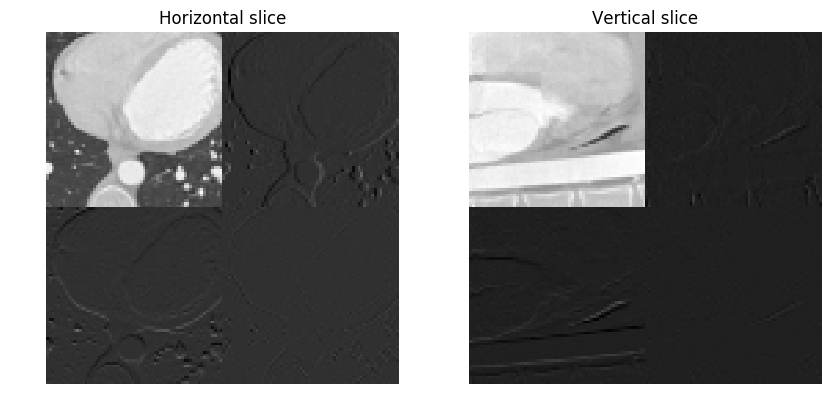

PyObject <matplotlib.text.Text object at 0x11474c690>

In [11]:
figure(figsize = (10, 5))
imageplot(MW[:, :, 30], "Horizontal slice", [1,2,1])
imageplot((MW[:, 30, :]), "Vertical slice", [1,2,2])

__Exercise 1__

Implement the forward wavelet transform by iteratively applying these
transform steps to the low pass residual.

In [12]:
include("NtSolutions/multidim_2_volumetric/exo1.jl")

In [13]:
## Insert your code here.

Volumetric Data Haar Approximation
----------------------------------
An approximation is obtained by keeping only the largest coefficients.


We threshold the coefficients to perform $m$-term approximation.

number of kept coefficients

In [14]:
m = Int(round(.01*n^3))
MWT = NtToolBox.perform_thresholding(MW, m, "largest");

__Exercise 2__

Implement the backward transform to compute an approximation $M_1$ from
the coefficients MWT.

In [15]:
include("NtSolutions/multidim_2_volumetric/exo2.jl")

In [16]:
## Insert your code here.

Display the approximation as slices.

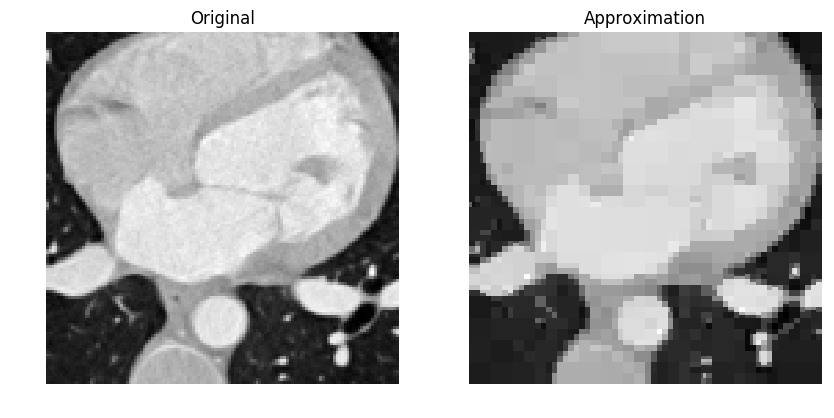

PyObject <matplotlib.text.Text object at 0x330c09190>

In [17]:
s = 30

figure(figsize = (10, 5))
imageplot(M[:, :, s], "Original", [1, 2, 1])
imageplot(clamP(M1[:, :, s]), "Approximation", [1,2,2])

Display the approximated isosurface.

In [18]:
isosurface(M1, .5, 2, "")

LoadError: UndefVarError: isosurface not defined

Linear Volumetric Denoising 
----------------------------
Linear denoising is obtained by low pass filtering.


We add a Gaussian noise to the image.

In [19]:
sigma = .06
Mnoisy = M + sigma.*randn(n, n, n);

Display slices of the noisy data.

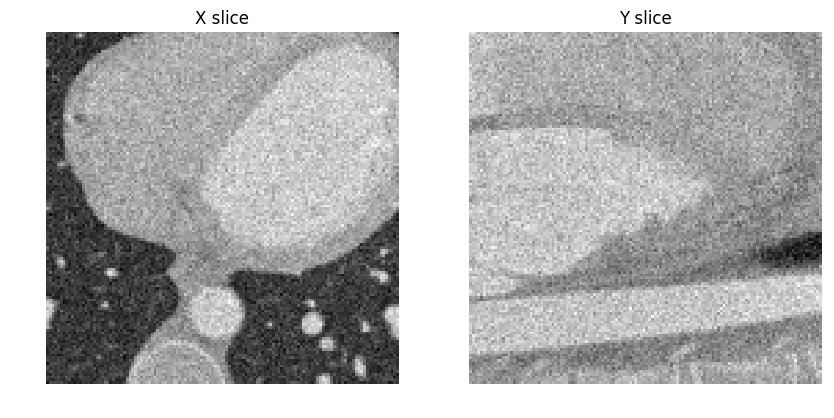

PyObject <matplotlib.text.Text object at 0x32f42b110>

In [20]:
figure(figsize = (10, 5))
imageplot(Mnoisy[:, :, Base.div(n, 2)], "X slice", [1,2,1])
imageplot(Mnoisy[:, Base.div(n, 2), :], "Y slice", [1,2,2])

A simple denoising method performs a linear filtering of the data.


We build a Gaussian filter of width $\sigma$.

Construct a 3D grid

In [26]:
x = -Base.div(n, 2) : Base.div(n, 2) - 1
include("NtToolBox/src/ndgrid.jl")
(X, Y, Z) = meshgrid(x, x, x);

Gaussian filter

In [27]:
s = 2 #width
h = exp(-(X.^2 + Y.^2 + Z.^2)./(2*s^2))
h = h/sum(h);

The filtering is computed over the Fourier domain.

In [28]:
Mh = real( plan_ifft((plan_fft(Mnoisy)*Mnoisy) .* (plan_fft(fftshift(h))*fftshift(h)) )*((plan_fft(Mnoisy)*Mnoisy) .* (plan_fft(fftshift(h))*fftshift(h)) ) );

Display denoised slices.

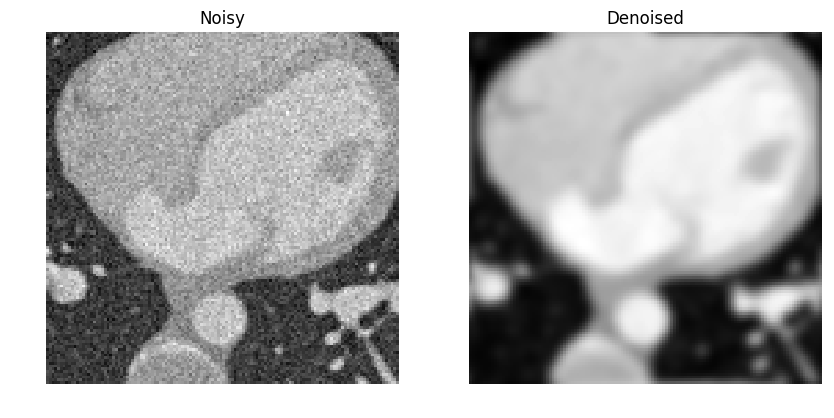

PyObject <matplotlib.text.Text object at 0x32e99be10>

In [29]:
i = 40
figure(figsize = (10, 5))
imageplot(Mnoisy[:, :, i], "Noisy", [1, 2, 1])
imageplot(Mh[:, :, i], "Denoised", [1, 2, 2])

Display denoised iso-surface.

In [30]:
# isosurface(M, .5, 3, "") # you need to install scikit-image to be able to run this line

__Exercise 3__

Select the optimal blurring width $s$ to reach the smallest possible
SNR. Keep the optimal denoising Mblur.

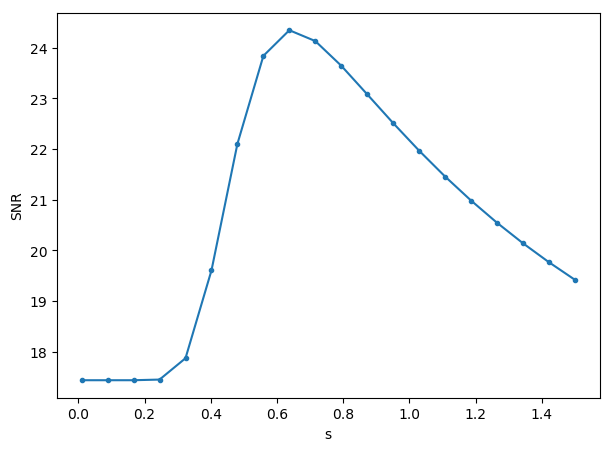

In [31]:
include("NtSolutions/multidim_2_volumetric/exo3.jl")

In [32]:
## Insert your code here.

Display optimally denoised iso-surface.

In [33]:
isosurface(Mblur, .5, 2, "")
print(@sprintf("Filtering, SNR = %.1f dB", snr(M, Mblur)))

LoadError: UndefVarError: isosurface not defined

Non-Linear Wavelet Volumetric Denoising 
----------------------------------------
Denoising is obtained by removing small amplitude coefficients that
corresponds to noise.

__Exercise 4__

Perforn Wavelet denoising by thresholding the wavelet coefficients of
Mnoisy. Test both hard thresholding and soft thresholding to determine
the optimal threshold and the corresponding SNR.
Record the optimal result Mwav.

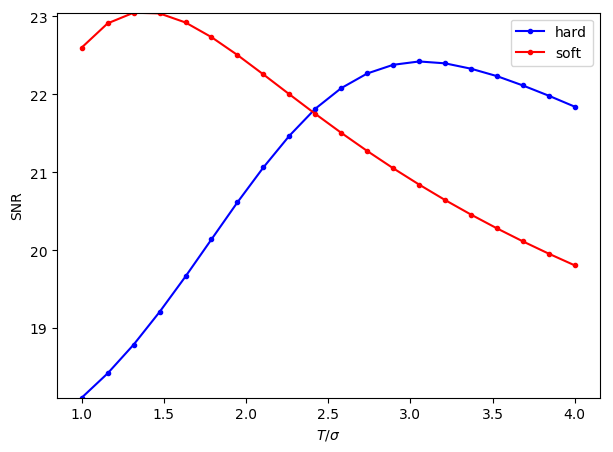

In [34]:
include("NtSolutions/multidim_2_volumetric/exo4.jl")

In [35]:
## Insert your code here.

Display denoised iso-surface with optimal soft thresholding.

In [36]:
# isosurface(Mblur, .5, 2, "") # you need to install scikit-image to be able to run this line
print(@sprintf("Soft thresholding, SNR = %.1f dB", snr(M, Mwav)))

Soft thresholding, SNR = 23.0 dB

Orthogonal wavelet thresholdings suffers from blocking artifacts.
This can be aleviated by performing a cycle spinning denoising, which
averages the denosing result of translated version of the signal.


A typical cycle spinning process is like this.

Maximum translation.

In [37]:
w = 4;

List of translations.

In [38]:
include("NtToolBox/src/ndgrid.jl")
(dX, dY, dZ) = ndgrid(0 : w - 1, 0 : w - 1, 0 : w - 1)
dX = dX[:]
dY = dY[:]
dZ = dZ[:];

Initialize spinning process.

In [39]:
Mspin = zeros(n, n, n);

Spin.

In [40]:
for i in 1 : w^3
    # shift the image
    MnoisyC = circshift(Mnoisy, [dX[i] dY[i] dZ[i]]);
    # denoise the image to get a result M1
    M1 = MnoisyC; # replace this line by some denoising
    # shift inverse
    M1 = circshift(M1, -[dX[i] dY[i] dZ[i]]);
    # average the result
    Mspin = Mspin.*(i - 1)/i + M1./i;
end


__Exercise 5__

Implement cycle spinning hard thresholding with $T=3\sigma$.

In [41]:
T = 3*sigma;
w = 4;
(dX, dY, dZ) = ndgrid(0 : w - 1, 0 : w - 1, 0 : w - 1);
Mspin = zeros(n, n, n);
for i in 1:w^3
    MnoisyC = circshift(Mnoisy, [dX[i] dY[i] dZ[i]]);
    # denoise
    MW = NtToolBox.perform_haar_transf(MnoisyC, 1, +1);
    MWT = NtToolBox.perform_thresholding(MW, T, "hard");
    M1 = NtToolBox.perform_haar_transf(MWT, 1, -1);
    # back
    M1 = circshift(M1, -[dX[i] dY[i] dZ[i]]);
    Mspin = Mspin.*(i-1)/i + M1/i;
end

In [42]:
## Insert your code here.

Display denoised iso-surface.

In [43]:
# isosurface(Mspin, .5, 2, "")
print(@sprintf("Cycle spinning, SNR = %.1f dB", snr(M, Mspin)))

LoadError: UndefVarError: isosurface not defined